<a href="https://colab.research.google.com/github/shuntarotobari/qmacro2nd/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

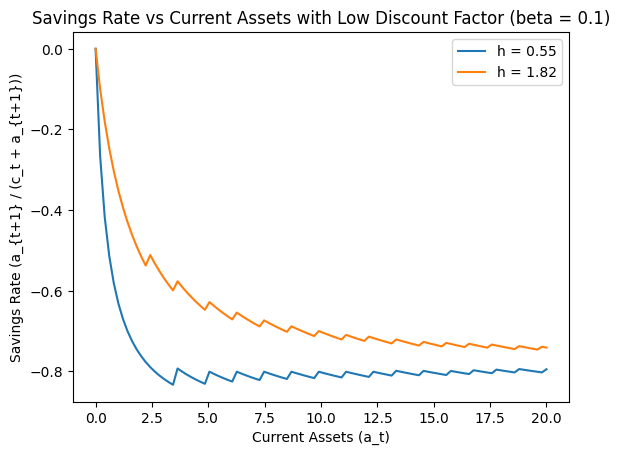

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
sigma = 1.5
beta = 0.1  # 低い時間選好率
rho = 0.6
sigma_epsilon = 0.6
r = 0.04
w = 1

# 生産性のグリッド設定
hL = np.exp(-sigma_epsilon)
hH = np.exp(sigma_epsilon)

# 遷移確率行列の設定（簡略化のため）
P = np.array([[0.5, 0.5],
              [0.5, 0.5]])

# 資産のグリッド設定
a_min = 0
a_max = 20
a_size = 100
a_grid = np.linspace(a_min, a_max, a_size)

# 初期化
V = np.zeros((2, a_size))
policy = np.zeros((2, a_size))

# 価値関数反復法
tolerance = 1e-6
max_iter = 1000
diff = tolerance + 1
iteration = 0

while diff > tolerance and iteration < max_iter:
    V_new = np.copy(V)
    for i, h in enumerate([hL, hH]):
        for j, a in enumerate(a_grid):
            c = w * h + (1 + r) * a - a_grid
            c[c <= 0] = 1e-10  # 消費が正でない場合の処理
            U = (c ** (1 - sigma)) / (1 - sigma)
            expected_V = beta * (P[i, 0] * V[0] + P[i, 1] * V[1])
            V_new[i, j] = np.max(U + expected_V)
            policy[i, j] = a_grid[np.argmax(U + expected_V)]

    diff = np.max(np.abs(V_new - V))
    V = V_new
    iteration += 1

# 貯蓄率の計算とプロット
fig, ax = plt.subplots()
for i, h in enumerate([hL, hH]):
    savings_rate = (policy[i] - a_grid) / (w * h + (1 + r) * a_grid)
    ax.plot(a_grid, savings_rate, label=f'h = {h:.2f}')

ax.set_xlabel('Current Assets (a_t)')
ax.set_ylabel('Savings Rate (a_{t+1} / (c_t + a_{t+1}))')
ax.legend()
plt.title('Savings Rate vs Current Assets with Low Discount Factor (beta = 0.1)')
plt.show()
